<a href="https://colab.research.google.com/gist/beavis28/5244d2340761b45f490a240eb7d54f30/python-usstockdataanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin

In [1]:
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [24, 8]

In [2]:
symbol = "ZM"

In [3]:
hist_data = si.get_data(symbol)
hist_data

,open,high,low,close,adjclose,volume,ticker
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,ZM
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,ZM
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,ZM
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,ZM
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,ZM
...,...,...,...,...,...,...,...
2021-11-05,267.100006,275.640015,259.769989,264.700012,264.700012,5373200,ZM
2021-11-08,262.649994,263.179993,257.940002,259.899994,259.899994,3944100,ZM
2021-11-09,260.989990,265.660004,257.570007,258.399994,258.399994,3022500,ZM
2021-11-10,257.010010,259.470001,249.000000,251.259995,251.259995,4903900,ZM


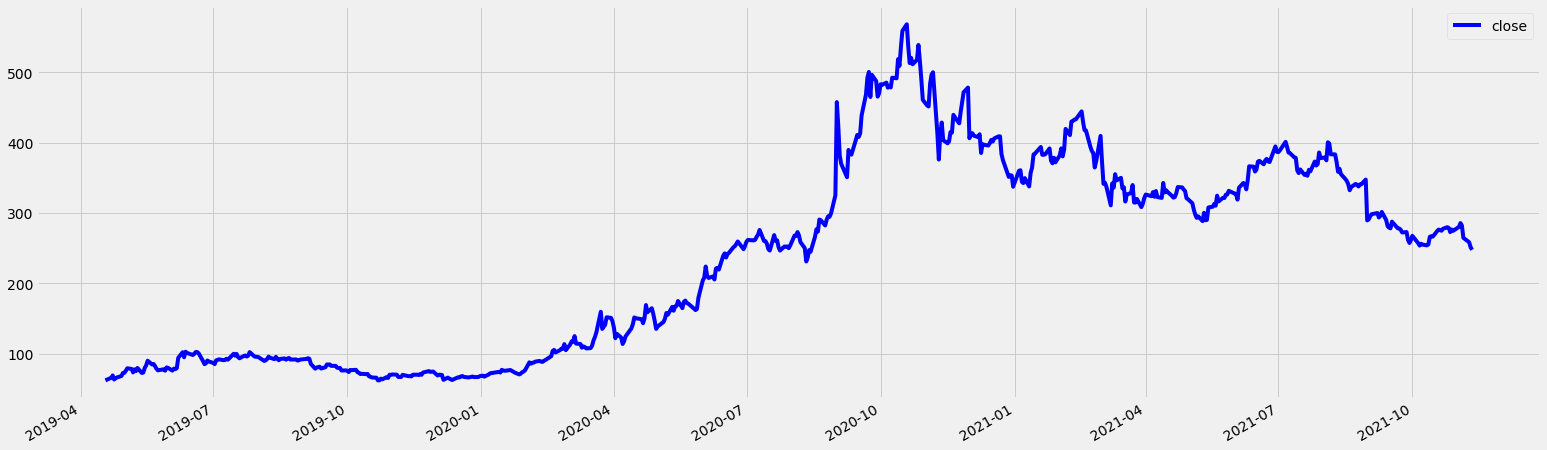

In [4]:
chart = hist_data.plot(kind='line', y='close',color='blue')

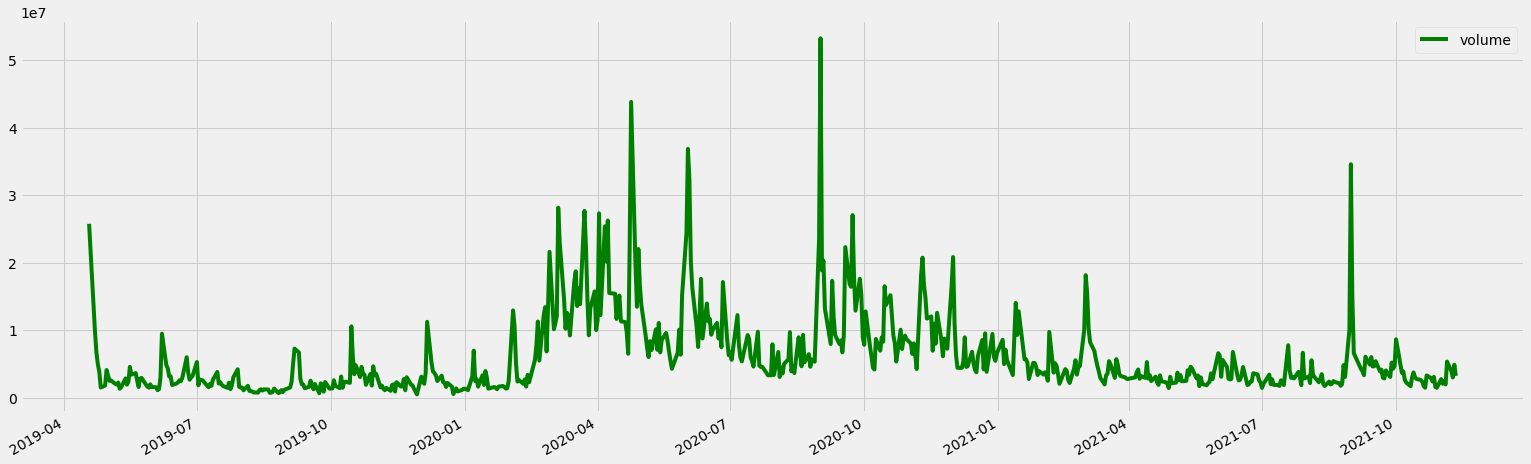

In [7]:
volume = hist_data.plot(kind='line', y='volume',color='green')

In [8]:
income_statement = si.get_income_statement(symbol, yearly = False)
income_statement

endDate,2021-07-31,2021-04-30,2021-01-31,2020-10-31
Breakdown,,,,
researchDevelopment,82311000,65175000,52375000,42582000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,323884000,228931000,264653000,194021000
minorityInterest,None,None,None,None
netIncome,317084000,227531000,260610000,198642000
sellingGeneralAdministrative,383325000,332856000,306709000,283645000
grossProfit,760239000,691243000,615201000,518469000
ebit,294603000,293212000,256117000,192242000
operatingIncome,294603000,293212000,256117000,192242000


<AxesSubplot:xlabel='endDate'>

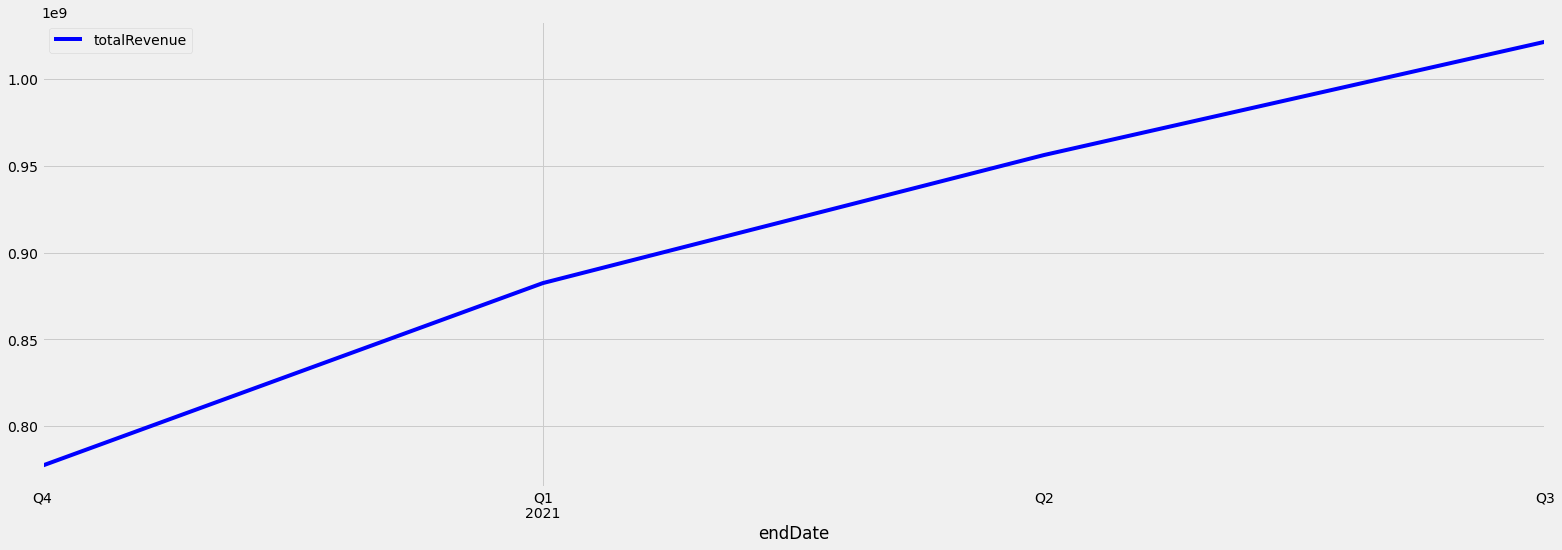

In [9]:
income_statement_for_graph = si.get_income_statement(symbol, yearly = False).transpose()
income_statement_for_graph.plot(kind='line', y='totalRevenue',color='blue')

<AxesSubplot:xlabel='endDate'>

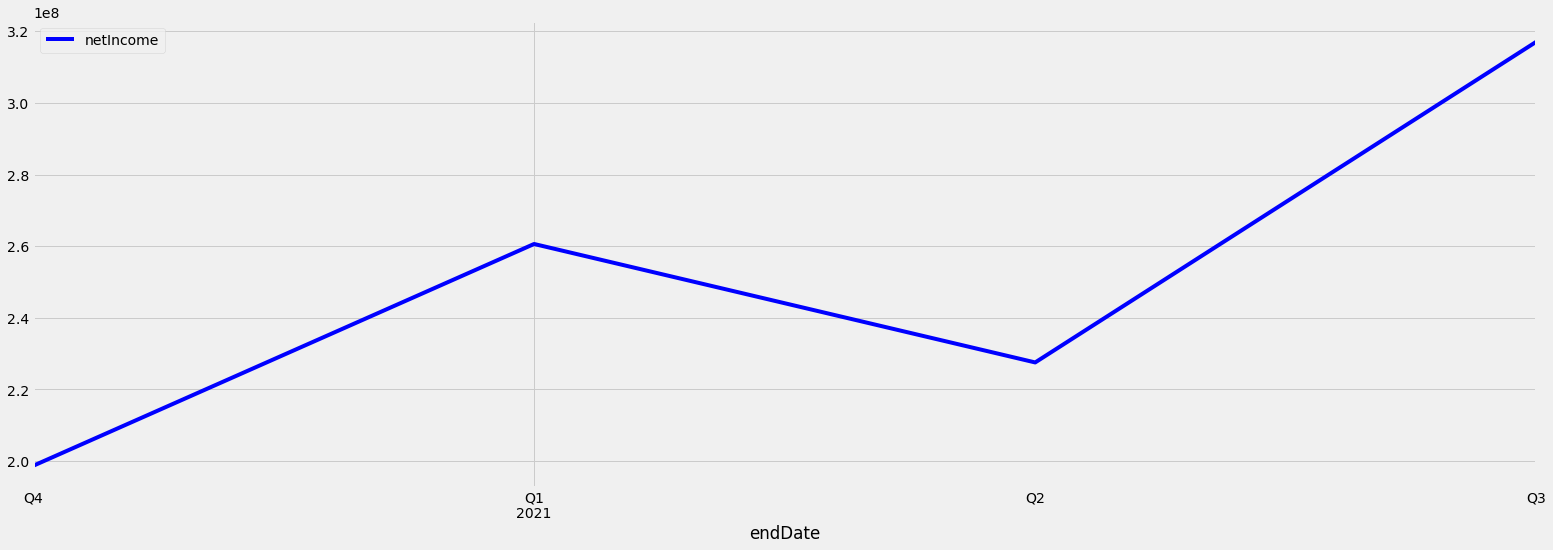

In [10]:
income_statement_for_graph = si.get_income_statement(symbol, yearly = False).transpose()
income_statement_for_graph.plot(kind='line', y='netIncome',color='blue')

In [11]:
income_statement_yearly = si.get_income_statement(symbol, yearly = True)
market_cap = si.get_quote_table(symbol)['Market Cap']
market_cap_char = market_cap[-1]
unit = 0
if market_cap_char == 'B':
    unit = 1000000000
elif market_cap_char == 'T':
    unit = 1000000000000
elif market_cap_char == 'M':
    unit = 1000000
                
psr = (float(market_cap[:-1]) * unit) / (income_statement.loc['totalRevenue'][0]+income_statement.loc['totalRevenue'][1]+income_statement.loc['totalRevenue'][2]+income_statement.loc['totalRevenue'][3])
psr

20.225638386402643

In [12]:
fourty_rule = (income_statement.loc['grossProfit'][0]/income_statement.loc['grossProfit'][1] - 1) + (income_statement.loc['totalRevenue'][0]/income_statement.loc['totalRevenue'][1] - 1)
"{0:.0%}".format(fourty_rule)

'17%'

In [13]:
# quaterly base growth rate

nasdaq_list = ["AAPL","ADBE","AMD","AMZN","ATVI","AVGO","BA","BABA","BOX","CCI","CHGG","CRM","CRWD","CSCO","CTXS","CVNA",
               "DBX","DDOG","DIS","DLR","DOCU","EA","EBAY","EQIX","ETSY","FB","FSLY","FVRR","GDS","GILD","GOOG","HON","IBM",
               "INTC","ISRG","KMX","LOGI","LYFT","MA","MCK","MDB","MSFT","MTCH","MU","NDX","NET","NFLX","NUE",
               "NVDA","OKTA","ORCL","PANW","PINS", "PYPL","QCOM","RNG","PTON","ROKU","SHOP","SNAP","SNOW",
               "SPLK","SPOT","SQ","SWKS","T","TEAM","TMO","TMUS","TSLA","TTD","TTWO","TW","TWLO","TWTR","U",
               "V","VMW","VZ","WDAY","WIX","WORK","XLNX","ZI", "ZM","ZS"]  # si.tickers_nasdaq()

symbol_list = []
gross_profit_list = []
total_revenue_list = []
gross_growth_list = []
revenue_growth_list = []
fourty_list = []
psr_list = []
for symbol in nasdaq_list:
    try:
        income_statement = si.get_income_statement(symbol, yearly = False)
        fourty_rule = (income_statement.loc['grossProfit'][0]/income_statement.loc['grossProfit'][1] - 1) + (income_statement.loc['totalRevenue'][0]/income_statement.loc['totalRevenue'][1] - 1)
        if fourty_rule > 0.4:
            gross_profit = income_statement.loc['grossProfit'][0]
            total_revenue = income_statement.loc['totalRevenue'][0]
            gross_growth = (income_statement.loc['grossProfit'][0]/income_statement.loc['grossProfit'][1] - 1)
            total_revenue_growth = (income_statement.loc['totalRevenue'][0]/income_statement.loc['totalRevenue'][1] - 1)

            market_cap = si.get_quote_table(symbol)['Market Cap']
            market_cap_char = market_cap[-1]
            unit = 0
            if market_cap_char == 'B':
                unit = 1000000000
            elif market_cap_char == 'T':
                unit = 1000000000000
            elif market_cap_char == 'M':
                unit = 1000000
                
            psr = (float(market_cap[:-1]) * unit) / (income_statement.loc['totalRevenue'][0]+income_statement.loc['totalRevenue'][1]+income_statement.loc['totalRevenue'][2]+income_statement.loc['totalRevenue'][3])

                
            symbol_list.append(symbol)
            #fourty_list.append("{0:.0%}".format(fourty_rule))
            gross_profit_list.append(gross_profit)
            total_revenue_list.append(total_revenue)
            gross_growth_list.append(gross_growth)
            revenue_growth_list.append(total_revenue_growth)
            fourty_list.append(round(fourty_rule,2)*100)
            psr_list.append(psr)
            
    except Exception as e:
        str(e)
        
# result
result_df = pd.DataFrame(list(zip(gross_profit_list, total_revenue_list, gross_growth_list, revenue_growth_list, fourty_list, psr_list)), columns=['grossProfit','totalRevenue','GrossGrowth','RevenueGrowth','Percentage', 'PSR'], index=symbol_list)
result_df

,grossProfit,totalRevenue,GrossGrowth,RevenueGrowth,Percentage,PSR
GILD,6023000000,7421000000,0.247773,0.193663,44.0,3.077760
NUE,3406273000,10313223000,0.377105,0.173402,55.0,1.032550
OKTA,215052000,315500000,0.163179,0.256942,42.0,38.798380
SNOW,166077000,272198000,0.262290,0.189084,45.0,130.490918
SPLK,422336000,605743000,0.279244,0.206537,49.0,10.972679
TSLA,3660000000,13757000000,0.269071,0.150443,42.0,22.797131


In [ ]:
result_df.plot(kind='bar', y='totalRevenue',color='blue')

In [ ]:
result_df.plot(kind='bar', y='grossProfit',color='blue')

In [ ]:
p = result_df.plot(kind='scatter',x='GrossGrowth',y='RevenueGrowth',color='red', marker='x')
p.set_xlabel('IncomeGrowth', fontsize=16)
p.set_ylabel('RevenueGrowth', fontsize=14)
p.set_title('Income Statement', fontsize=18)
plt.rcParams['figure.figsize'] = [20, 8]

for i in range(0,result_df.shape[0]):
     p.text(result_df.GrossGrowth[i], result_df.RevenueGrowth[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')


In [ ]:
p = result_df.plot(kind='scatter',x='Percentage',y='PSR',color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('PSR', fontsize=14)
p.set_title('Rule of 40% Graph', fontsize=18)

for i in range(0,result_df.shape[0]):
     p.text(result_df.Percentage[i], result_df.PSR[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')

In [ ]:
new_column = []
for symbol in result_df.index: 
    try:
        three_months_ago = date.today() + relativedelta(months=-3)
        three_months_ago_yyyy_mm_dd = three_months_ago.strftime('%Y-%m-%d')
        hist_data = si.get_data(symbol, start_date=three_months_ago_yyyy_mm_dd)
        price_growth = hist_data.iloc[-1, hist_data.columns.get_loc('close')]/hist_data.iloc[0, hist_data.columns.get_loc('close')] - 1
        new_column.append(price_growth*100) 
    except Exception as e:
        print(str(e))
        
new_column

In [ ]:
result_df['Price_growth'] = new_column 

In [ ]:
result_df = result_df.sort_values(by=['Price_growth'], ascending=False)
result_df

In [ ]:
new_column = []
for index, row in result_df.iterrows():
    try:
        new_column.append(row['Percentage'] / row['PSR'])
    except Exception as e:
        print(str(e))
        
result_df['percentage/PSR'] = new_column
result_df = result_df.sort_values(by=['percentage/PSR'], ascending=False)
result_df

In [ ]:
new_column = []
for index, row in result_df.iterrows():
    try:
        market_cap = si.get_quote_table(index)['Market Cap']
        market_cap_char = market_cap[-1]
        unit = 0
        if market_cap_char == 'B':
            unit = 1000000000
        elif market_cap_char == 'T':
            unit = 1000000000000
        elif market_cap_char == 'M':
            unit = 1000000
                       
        marketCap = (float(market_cap[:-1]) * unit)
        new_column.append(marketCap)
    except Exception as e:
        print(str(e))
        
result_df['marketCap'] = new_column
result_df

In [ ]:
result_df.plot(kind='bar', y='marketCap',color='blue')

In [ ]:
estimate_column = []
estimate_price_column = []
current_price_column = []

for index, row in result_df.iterrows():
    try:
        estimate = si.get_analysts_info(index)['Growth Estimates'].iloc[1,1]
        if type(estimate) == str:
            estimate_float = float(estimate[:-1].replace(",", ""))
            four_months_ago = date.today() + relativedelta(months=-4)
            hist_data = si.get_data(index, start_date=four_months_ago)
            four_months_ago_price = hist_data.iloc[0, hist_data.columns.get_loc('close')]
            cur_price = hist_data.iloc[-1, hist_data.columns.get_loc('close')]
            abs_value = abs(cur_price - four_months_ago_price)
            future_price = (abs_value * (estimate_float/100)) + four_months_ago_price
        else:
            estimate_float = 0
            future_price = 0
            cur_price = 0
        current_price_column.append(cur_price)    
        estimate_column.append(estimate_float)
        estimate_price_column.append(future_price)
    except Exception as e:
        print(str(e))
        
result_df['nextQuarterlyEstimate'] = estimate_column
result_df['current price'] = current_price_column
result_df['estimated price'] = estimate_price_column
result_df

In [ ]:
result_df.plot(kind='bar', y='nextQuarterlyEstimate',color='blue')

In [ ]:
p = result_df.plot(kind='scatter',x='Percentage',y='Price_growth',color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('Price_growth', fontsize=14)
p.set_title('Price Growth vs Income Growth', fontsize=18)

for i in range(0,result_df.shape[0]):
     p.text(result_df.Percentage[i], result_df.Price_growth[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')